In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Introduction 

The aim is to predict sales for various product families (i.e. Automotive, Babycare, Beauty, Books etc.) sold at Favorita stores located in Ecuador. The training data includes dates, store number, product information, whether the product was on promotion, and sales numbers. 

Supplementary information is provided in other files which can be used to help build the model.

#### Additional Notes

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

## Step 1 - Preprocess datasets (training data and supplementary data)

In [44]:
#import libraries

import pandas as pd

import matplotlib.pyplot as plt

import plotly as py
import plotly.express as px

import seaborn as sns

import pandas as pd
import numpy as np


In [9]:
train_data = pd.read_csv(r"C:\Users\Krupa\Downloads\store-sales-time-series-forecasting\train.csv")
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [12]:
train_data.shape

(3000888, 6)

In [14]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [10]:
print('Missing values (%) per column: \n', 100*train_data.isnull().mean())

Missing values (%) per column: 
 id             0.0
date           0.0
store_nbr      0.0
family         0.0
sales          0.0
onpromotion    0.0
dtype: float64


In [5]:
#let's take a look at the supplementary datasets
hol_events = pd.read_csv(r"C:\Users\Krupa\Downloads\store-sales-time-series-forecasting\holidays_events.csv")
hol_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [21]:
missing_hol_vals = hol_events.isna().sum()
missing_hol_vals

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [6]:
oil_df = pd.read_csv(r"C:\Users\Krupa\Downloads\store-sales-time-series-forecasting\oil.csv")
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [23]:
missing_oil_vals = oil_df.isna().sum()
missing_oil_vals

date           0
dcoilwtico    43
dtype: int64

In [25]:
oil_df.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [26]:
#determine median oil price

import math 
median_oil_price = math.floor(oil_df.dcoilwtico.median())
median_oil_price

53

In [27]:
#let's fill in the missing values in the oil price column with the median value as this is more robust to outliers  

oil_df.dcoilwtico = oil_df.dcoilwtico.fillna(median_oil_price)
oil_df.head()

,date,dcoilwtico
0,2013-01-01,53.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
stores_df = pd.read_csv(r"C:\Users\Krupa\Downloads\store-sales-time-series-forecasting\stores.csv")
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [28]:
missing_store_vals = stores_df.isna().sum()
missing_store_vals

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [8]:
transactions_df = pd.read_csv(r"C:\Users\Krupa\Downloads\store-sales-time-series-forecasting\transactions.csv")
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [29]:
missing_trans_vals = transactions_df.isna().sum()
missing_trans_vals

date            0
store_nbr       0
transactions    0
dtype: int64

## Data Analysis 

In [30]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [42]:
train_data['date'].max()

'2017-08-15'

In [43]:
train_data['date'].min()

'2013-01-01'

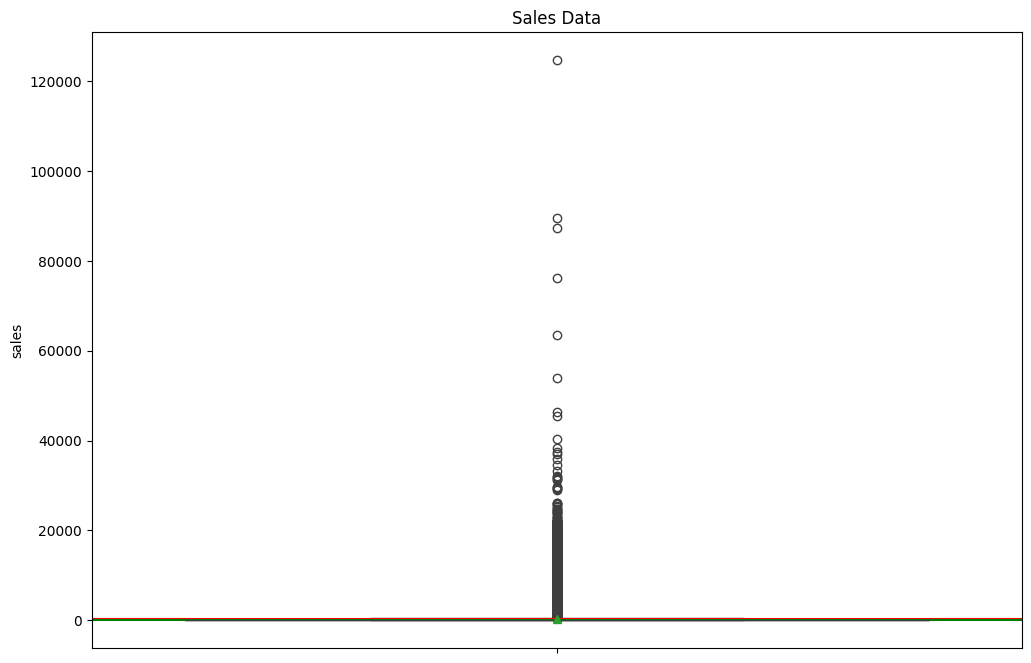

In [46]:
#Let's take a closer look at the spread of the sales data 
plt.figure(figsize = (12,8))

sns.boxplot(data=train_data, y ='sales', showmeans=True)

mean_sales=train_data['sales'].mean()
median_sales=train_data['sales'].median()
plt.axhline(y=mean_sales, color='r', linestyle='-')
plt.axhline(y=median_sales, color='g', linestyle='-')

plt.title('Sales Data')

plt.show()

In [33]:
train_data.groupby('family')['sales'].count()

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

In [34]:
train_data['family'].nunique()

33

In [41]:
train_data['sales'].value_counts()

sales
0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: count, Length: 379610, dtype: int64